## 🌑 Notebook Overview: Grayscale Level Check for Blank Image Creation

This notebook is designed to **analyze the grayscale level of existing images** in the dataset to help generate a blank image with a matching background tone. This step is essential for enhancing the quality of region-of-interest (ROI) training, especially in object detection tasks using models like YOLO.

---

### 🎯 Purpose

- **Detect the dominant grayscale intensity** in background regions of training images.
- **Generate a blank template image** with a similar grayscale level to blend naturally during data augmentation or region isolation.
- **Improve model performance** by maintaining background consistency, which helps YOLO focus on relevant objects/regions.

---

### 🛠️ Main Steps

1. **Convert training images to grayscale** (if not already).
2. **Analyze pixel intensity distribution** to find the most frequent grayscale value (mode or mean).
3. **Visualize the intensity histogram** for understanding background brightness.


---

### 🤖 Importance for YOLO ROI Training

Maintaining **consistent background tone** across training images helps:
- Minimize noise from unnatural backgrounds,
- Focus the model's learning on foreground features,
- Avoid overfitting to artifacts in synthetic data.

By matching the grayscale level, the augmented data becomes **more realistic**, leading to better generalization during inference.

---

### ✅ Output

- A computed grayscale value representative of your dataset’s background.



In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

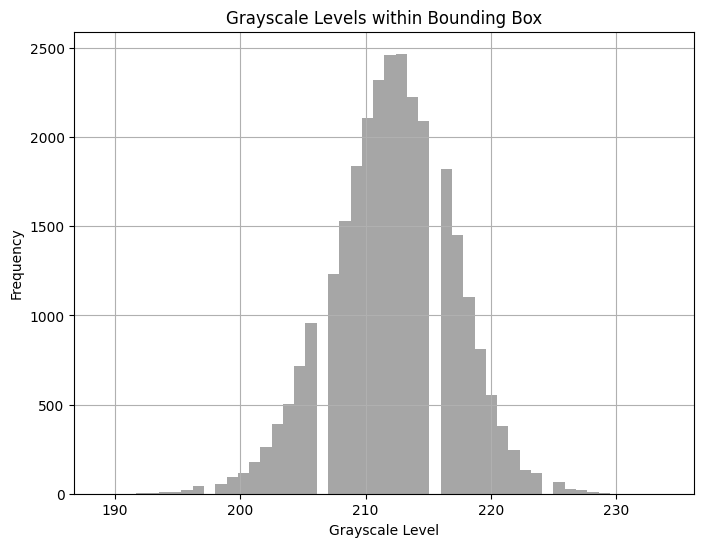

In [ ]:
# Load the original image
original_image = cv2.imread("IMG_1617.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Bounding box coordinates (YOLO format)
x_center_norm, y_center_norm, width_norm, height_norm = 0.183338, 0.152826, 0.174256, 0.013673

# Convert normalized coordinates to pixel coordinates
height, width = gray_image.shape[:2]
x_center = int(x_center_norm * width)
y_center = int(y_center_norm * height)
width_pixels = int(width_norm * width)
height_pixels = int(height_norm * height)
x1 = max(0, x_center - width_pixels // 2)
y1 = max(0, y_center - height_pixels // 2)
x2 = min(width, x_center + width_pixels // 2)
y2 = min(height, y_center + height_pixels // 2)

# Extract pixel values within the bounding box
bbox_pixels = gray_image[y1:y2, x1:x2]

#Compute grayscale levels
grayscale_levels = bbox_pixels.flatten()

# Plot the grayscale levels
plt.figure(figsize=(8, 6))
plt.hist(grayscale_levels, bins=50, color='gray', alpha=0.7)
plt.title('Grayscale Levels within Bounding Box')
plt.xlabel('Grayscale Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

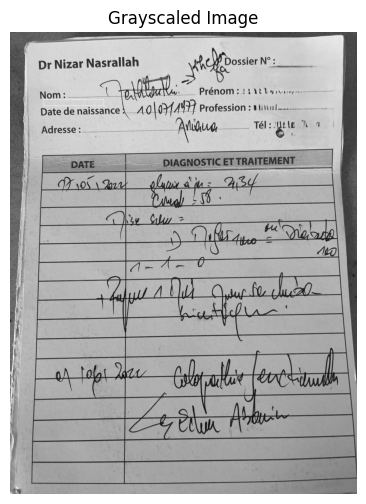

In [6]:

# Draw bounding box on the grayscaled image
annotated_image = cv2.rectangle(gray_image.copy(), (x1, y1), (x2, y2), (255, 0, 0), 2)

# Plot the grayscaled image with bounding box
plt.figure(figsize=(8, 6))
plt.imshow(annotated_image, cmap='gray')
plt.title('Grayscaled Image')
plt.axis('off')
plt.show()

In [7]:
# Find the grayscale level with the highest frequency
hist, bins = np.histogram(grayscale_levels, bins=50)
max_freq_index = np.argmax(hist)
most_frequent_grayscale_level = (bins[max_freq_index] + bins[max_freq_index + 1]) / 2

print("Grayscale level with the most frequency:", most_frequent_grayscale_level)

Grayscale level with the most frequency: 212.85000000000002
